In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
data=pd.read_csv(r'C:\Users\Anjali\Downloads\Add_sales_data_2018.csv')

In [3]:
data.head()

,Date,Add1(in Thousands),Add2(in Thousands),Add3(in Thousands),Add4(in Thousands),Add5(in Thousands),Profit(in Thousands)
0,2018-10-08,208.00,222.25,206.85,216.00,215.15,4093.065
1,2018-10-05,217.00,218.60,205.90,210.25,209.20,4042.448
2,2018-10-04,223.50,227.80,216.15,217.25,218.20,4213.819
3,2018-10-03,230.00,237.50,225.75,226.45,227.60,4391.665
4,2018-10-01,234.55,234.60,221.05,230.30,230.90,4350.683


In [4]:
data.describe()

,Add1(in Thousands),Add2(in Thousands),Add3(in Thousands),Add4(in Thousands),Add5(in Thousands),Profit(in Thousands)
count,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000
mean,267.577561,271.722439,262.990732,267.223902,267.152683,5059.630234
std,26.219588,25.914939,26.126704,26.238832,26.215360,486.910414
min,208.000000,218.600000,205.900000,210.250000,209.200000,4042.448000
25%,244.000000,248.500000,240.300000,243.050000,243.000000,4617.695000
50%,269.700000,274.200000,263.250000,268.900000,268.350000,5088.455000
75%,284.400000,288.800000,280.900000,284.500000,284.450000,5387.438000
max,327.700000,328.750000,321.650000,325.950000,325.750000,6137.800000


In [5]:
data.isna().sum()

Date                    0
Add1(in Thousands)      0
Add2(in Thousands)      0
Add3(in Thousands)      0
Add4(in Thousands)      0
Add5(in Thousands)      0
Profit(in Thousands)    0
dtype: int64

# 1. First of all, check whether there is any relationship between the amount 
spent for advertising through five different companies and profit 
generated.

In [6]:
data.corr()

,Add1(in Thousands),Add2(in Thousands),Add3(in Thousands),Add4(in Thousands),Add5(in Thousands),Profit(in Thousands)
Add1(in Thousands),1.000000,0.990976,0.986274,0.976365,0.976716,0.991975
Add2(in Thousands),0.990976,1.000000,0.987990,0.989921,0.990285,0.999145
Add3(in Thousands),0.986274,0.987990,1.000000,0.991343,0.991908,0.993389
Add4(in Thousands),0.976365,0.989921,0.991343,1.000000,0.999699,0.993346
Add5(in Thousands),0.976716,0.990285,0.991908,0.999699,1.000000,0.993710
Profit(in Thousands),0.991975,0.999145,0.993389,0.993346,0.993710,1.000000


In [7]:
corrmatrix=data.corr()

<AxesSubplot:>

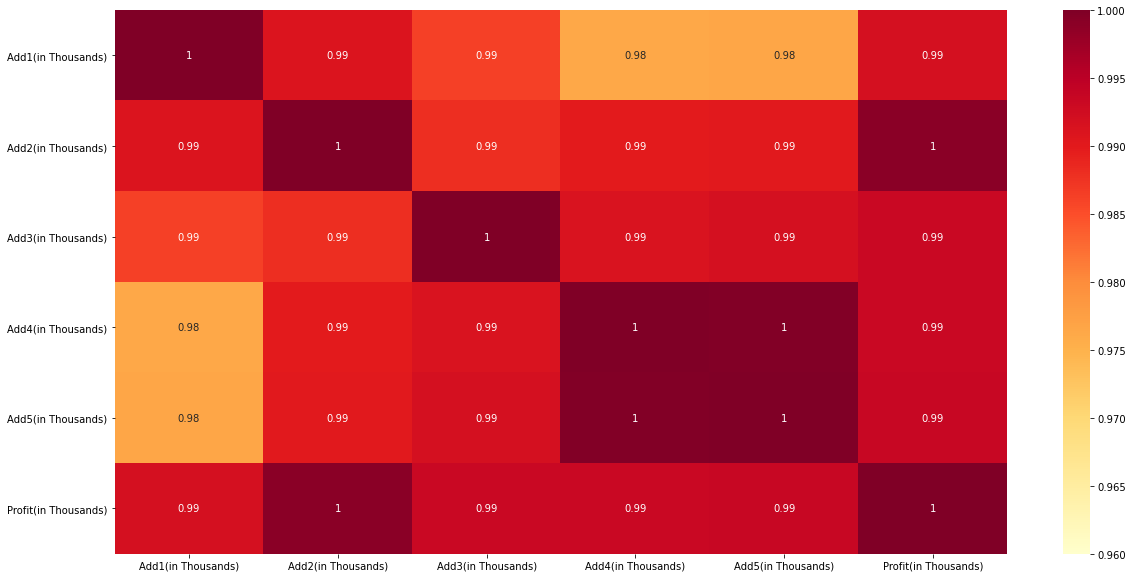

In [8]:
plt.subplots(figsize=(20,10))
sns.heatmap(corrmatrix,vmin=0.96,vmax=1,annot=True,cmap='YlOrRd')

In [9]:
data1=data.drop(['Add4(in Thousands)','Add2(in Thousands)'],axis=1)

In [10]:
data1.head()

,Date,Add1(in Thousands),Add3(in Thousands),Add5(in Thousands),Profit(in Thousands)
0,2018-10-08,208.00,206.85,215.15,4093.065
1,2018-10-05,217.00,205.90,209.20,4042.448
2,2018-10-04,223.50,216.15,218.20,4213.819
3,2018-10-03,230.00,225.75,227.60,4391.665
4,2018-10-01,234.55,221.05,230.90,4350.683


In [11]:
data1.shape

(205, 5)

In [12]:
dataa=data1.drop(['Date'],axis=1)

In [13]:
dataa.corr()

,Add1(in Thousands),Add3(in Thousands),Add5(in Thousands),Profit(in Thousands)
Add1(in Thousands),1.000000,0.986274,0.976716,0.991975
Add3(in Thousands),0.986274,1.000000,0.991908,0.993389
Add5(in Thousands),0.976716,0.991908,1.000000,0.993710
Profit(in Thousands),0.991975,0.993389,0.993710,1.000000


# 2. Build a regression model to predict the profit from the given data and 
comment your findings on it.


In [14]:
y=dataa['Profit(in Thousands)']
X=dataa.drop(['Profit(in Thousands)'],axis=1)

In [15]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,random_state=42,test_size=0.25)

In [16]:
from sklearn import linear_model

In [17]:
lr=linear_model.LinearRegression()
model=lr.fit(X_train,y_train)
predictions=model.predict(X_test)

In [18]:
print(predictions)

[4178.58454657 4428.54813826 5042.71048264 4931.30673182 5023.46891933
 4621.68278683 5379.72978678 5316.27211727 5207.65018008 5936.31904404
 5788.97682175 4987.02004585 5058.76669291 5803.99827084 4962.23217718
 5070.17123633 4218.42820743 5053.69803491 5036.23426986 5139.50767968
 5150.82394651 5409.42313499 4562.86989401 4612.68386118 4443.96376635
 4157.31137286 5592.85836116 5686.70409351 4658.54740072 5703.98287966
 4988.80672779 5199.35413355 5033.1367889  5527.50617746 5025.42825866
 5039.31336405 5113.95312155 4730.24799998 4603.9986369  4926.92669419
 5206.94555645 5043.66833367 5513.84042878 4993.6436058  4667.54765557
 4490.33360462 4471.68496138 5274.5529808  5415.90446474 4505.83974869
 4222.69965414 6025.94290344]


In [31]:
print(y_test)

15     4152.066
9      4446.441
100    5131.898
132    4907.560
68     5004.282
95     4623.793
159    5384.175
162    5328.025
147    5175.051
182    5956.323
191    5780.799
164    4997.719
65     5075.858
175    5784.540
73     4936.120
152    5065.652
18     4190.965
82     5034.726
86     5015.536
143    5134.657
60     5145.131
101    5421.940
98     4569.293
30     4598.292
25     4436.321
16     4175.677
168    5616.791
195    5667.250
97     4648.834
194    5717.838
67     5001.615
120    5182.368
154    5017.503
202    5545.013
79     5013.207
69     5030.451
145    5108.626
55     4760.877
45     4606.340
84     4925.861
146    5250.788
66     5038.222
111    5491.792
153    5019.997
96     4647.356
38     4486.380
24     4435.174
139    5300.437
112    5425.190
29     4482.183
19     4193.095
178    6062.457
Name: Profit(in Thousands), dtype: float64


# predicted and existing values are near to eachother

In [33]:
from sklearn.metrics import mean_squared_error


In [34]:
print('MSE is',mean_squared_error(y_test,predictions))

MSE is 525.8683805293639


# 3. Predict the profit generated by the company, if they wish to spend the 
following amount for advertisement.

Add1(in Thousands) 290
Add2(in Thousands) 312
Add3(in Thousands) 309
Add4(in Thousands) 298
Add5(in Thousands) 320

In [35]:
add=[[290,309,320]]


In [36]:
pro = model.predict(pd.DataFrame(add))

In [37]:
pro

array([5796.81610523])